In [6]:
import pandas as pd;
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
df = pd.read_csv('C:/Users/hgsgautam/Desktop/Python/PythonGIT/kickstarter.csv')

In [9]:
df.head(15)

,id,name,goal,pledged,state,country,currency,currency_trailing_code,staff_pick,backers_count,static_usd_rate,usd_pledged,category,spotlight
0,1526127826,conceptual-waist-aprons,300.0,321.00,successful,US,USD,True,False,18,1.000000,321.000000,Conceptual Art,True
1,2007987502,mjolby-porslinsravsmuseum-pin,3000.0,7070.00,successful,SE,SEK,True,False,79,0.121226,857.068103,Conceptual Art,True
2,1075407414,cool-dog-annual-sticker-fund-2016,3200.0,4431.12,successful,US,USD,True,False,148,1.000000,4431.120000,Conceptual Art,True
3,1038608633,uss-coral-sea-cvb-cva-cv-43-commemorative-chal...,2100.0,2500.00,successful,US,USD,True,False,56,1.000000,2500.000000,Conceptual Art,True
4,451699826,amrita-bottles-inc,1950.0,2240.00,successful,US,USD,True,False,31,1.000000,2240.000000,Conceptual Art,True
5,1765015841,draw-like-a-boss,30000.0,51833.32,successful,GB,GBP,False,False,1633,1.551660,80427.699680,Conceptual Art,True
6,1881968040,art-and-soul-body-painting-self-acceptance-aft...,300.0,322.00,successful,US,USD,True,False,14,1.000000,322.000000,Conceptual Art,True
7,1624053431,art-of-words-pop-artist,12000.0,12568.00,successful,US,USD,True,False,148,1.000000,12568.000000,Conceptual Art,True
8,759609400,the-new-oklahomaa-plan-to-improve-the-worst-pa...,100.0,1060.01,successful,US,USD,True,False,50,1.000000,1060.010000,Conceptual Art,True
9,96887393,mapping-budapest-budpst,500.0,615.00,successful,GB,GBP,False,False,34,1.520110,934.867835,Conceptual Art,True


In [10]:
df.describe

<bound method DataFrame.describe of               id                                               name      goal  \
0     1526127826                            conceptual-waist-aprons     300.0   
1     2007987502                      mjolby-porslinsravsmuseum-pin    3000.0   
2     1075407414                  cool-dog-annual-sticker-fund-2016    3200.0   
3     1038608633  uss-coral-sea-cvb-cva-cv-43-commemorative-chal...    2100.0   
4      451699826                                 amrita-bottles-inc    1950.0   
5     1765015841                                   draw-like-a-boss   30000.0   
6     1881968040  art-and-soul-body-painting-self-acceptance-aft...     300.0   
7     1624053431                            art-of-words-pop-artist   12000.0   
8      759609400  the-new-oklahomaa-plan-to-improve-the-worst-pa...     100.0   
9       96887393                            mapping-budapest-budpst     500.0   
10    1812065143                                      southern-rims    15

# Visualize and describe the distribution of pledged U.S. dollars (usd_pledged). These amounts represents the total funds raised in U.S. dollars for each project in the data set.

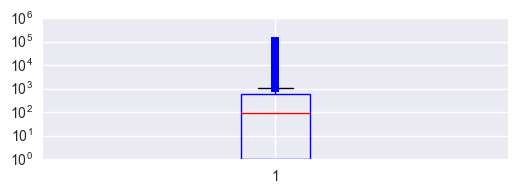

In [97]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
ax.boxplot(df.usd_pledged, 0, 'rs', 'gD', 0.75)
ax.set_yscale('log')

(array([  4.10200000e+03,   4.50000000e+01,   1.80000000e+01,
          7.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          4.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          3.00000000e+00]),
 array([      0.   ,   11111.177,   22222.354,   33333.531,   44444.708,
          55555.885,   66667.062,   77778.239,   88889.416,  100000.593,
         111111.77 ]),
 <a list of 10 Patch objects>)

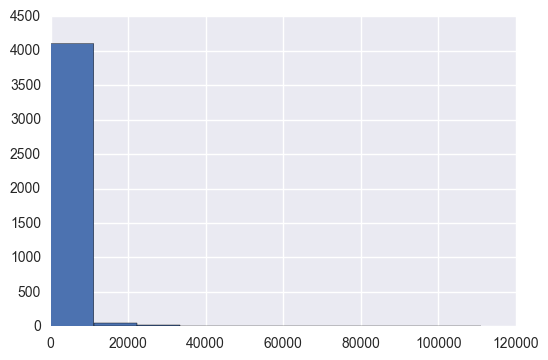

In [17]:
plt.hist(df.usd_pledged)

# Visualize and describe the relationship between the number of backers (i.e., contributors) and pledged U.S. dollars. Also, report any quantitative results that may support your description.

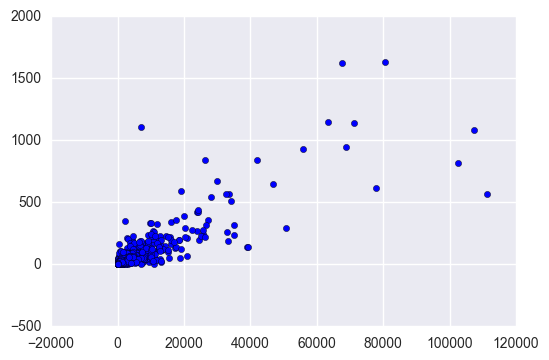

In [18]:
plt.scatter(df.usd_pledged, df.backers_count)

# Calculate a new column that contains the ratio of pledged amounts to the goal amounts, then visualize the distribution of these ratios as a function of the state of the fundraising campaign (e.g., successful, failed, etc.). How do the distributions compare to each other? 

In [19]:
nc =[]

In [20]:
nc = (df.pledged/df.goal)

In [21]:
nc 

0        1.070000
1        2.356667
2        1.384725
3        1.190476
4        1.148718
5        1.727777
6        1.073333
7        1.047333
8       10.600100
9        1.230000
10       1.024000
11       1.638933
12       1.195000
13       1.101250
14       1.523000
15       1.338750
16       1.016000
17       1.514000
18       1.294857
19       1.233333
20       1.083000
21       1.639714
22       1.022917
23       3.239402
24       1.380000
25       1.018004
26       1.051600
27       1.330000
28       1.388933
29       1.047500
          ...    
4154     0.000056
4155     0.351667
4156     0.000000
4157     0.090714
4158     0.007143
4159     0.508714
4160     0.795132
4161     0.014750
4162     0.010000
4163     0.151000
4164     0.024000
4165     0.020480
4166     0.014815
4167     0.000000
4168     0.190000
4169     0.281250
4170     0.001000
4171     0.172821
4172     0.000000
4173     0.000000
4174     0.266667
4175     0.015200
4176     0.010500
4177     0.203333
4178     0

In [58]:
df['Ratio'] = nc 

In [63]:
df

,id,name,goal,pledged,state,country,currency,currency_trailing_code,staff_pick,backers_count,static_usd_rate,usd_pledged,category,spotlight,Ratio
0,1526127826,conceptual-waist-aprons,300.0,321.00,successful,US,USD,True,False,18,1.000000,321.000000,Conceptual Art,True,1.070000
1,2007987502,mjolby-porslinsravsmuseum-pin,3000.0,7070.00,successful,SE,SEK,True,False,79,0.121226,857.068103,Conceptual Art,True,2.356667
2,1075407414,cool-dog-annual-sticker-fund-2016,3200.0,4431.12,successful,US,USD,True,False,148,1.000000,4431.120000,Conceptual Art,True,1.384725
3,1038608633,uss-coral-sea-cvb-cva-cv-43-commemorative-chal...,2100.0,2500.00,successful,US,USD,True,False,56,1.000000,2500.000000,Conceptual Art,True,1.190476
4,451699826,amrita-bottles-inc,1950.0,2240.00,successful,US,USD,True,False,31,1.000000,2240.000000,Conceptual Art,True,1.148718
5,1765015841,draw-like-a-boss,30000.0,51833.32,successful,GB,GBP,False,False,1633,1.551660,80427.699680,Conceptual Art,True,1.727777
6,1881968040,art-and-soul-body-painting-self-acceptance-aft...,300.0,322.00,successful,US,USD,True,False,14,1.000000,322.000000,Conceptual Art,True,1.073333
7,1624053431,art-of-words-pop-artist,12000.0,12568.00,successful,US,USD,True,False,148,1.000000,12568.000000,Conceptual Art,True,1.047333
8,759609400,the-new-oklahomaa-plan-to-improve-the-worst-pa...,100.0,1060.01,successful,US,USD,True,False,50,1.000000,1060.010000,Conceptual Art,True,10.600100
9,96887393,mapping-budapest-budpst,500.0,615.00,successful,GB,GBP,False,False,34,1.520110,934.867835,Conceptual Art,True,1.230000


In [37]:
categories = df.category.unique()
print(categories)

['Conceptual Art' 'Digital Art' 'Illustration' 'Painting' 'Ceramics']


In [75]:
dfbuffer = df[df.category == 'Conceptual Art']
dfbuffer

,id,name,goal,pledged,state,country,currency,currency_trailing_code,staff_pick,backers_count,static_usd_rate,usd_pledged,category,spotlight,Ratio
0,1526127826,conceptual-waist-aprons,300.0,321.00,successful,US,USD,True,False,18,1.000000,321.000000,Conceptual Art,True,1.070000
1,2007987502,mjolby-porslinsravsmuseum-pin,3000.0,7070.00,successful,SE,SEK,True,False,79,0.121226,857.068103,Conceptual Art,True,2.356667
2,1075407414,cool-dog-annual-sticker-fund-2016,3200.0,4431.12,successful,US,USD,True,False,148,1.000000,4431.120000,Conceptual Art,True,1.384725
3,1038608633,uss-coral-sea-cvb-cva-cv-43-commemorative-chal...,2100.0,2500.00,successful,US,USD,True,False,56,1.000000,2500.000000,Conceptual Art,True,1.190476
4,451699826,amrita-bottles-inc,1950.0,2240.00,successful,US,USD,True,False,31,1.000000,2240.000000,Conceptual Art,True,1.148718
5,1765015841,draw-like-a-boss,30000.0,51833.32,successful,GB,GBP,False,False,1633,1.551660,80427.699680,Conceptual Art,True,1.727777
6,1881968040,art-and-soul-body-painting-self-acceptance-aft...,300.0,322.00,successful,US,USD,True,False,14,1.000000,322.000000,Conceptual Art,True,1.073333
7,1624053431,art-of-words-pop-artist,12000.0,12568.00,successful,US,USD,True,False,148,1.000000,12568.000000,Conceptual Art,True,1.047333
8,759609400,the-new-oklahomaa-plan-to-improve-the-worst-pa...,100.0,1060.01,successful,US,USD,True,False,50,1.000000,1060.010000,Conceptual Art,True,10.600100
9,96887393,mapping-budapest-budpst,500.0,615.00,successful,GB,GBP,False,False,34,1.520110,934.867835,Conceptual Art,True,1.230000


In [79]:
x = []
for i in dfbuffer.Ratio:
           x.append(i) 

In [80]:
x

[1.0700000000000001,
 2.3566666666666665,
 1.384725,
 1.1904761904761905,
 1.1487179487179486,
 1.7277773333333333,
 1.0733333333333333,
 1.0473333333333332,
 10.600099999999999,
 1.23,
 1.024,
 1.6389333333333334,
 1.1950000000000001,
 1.1012500000000001,
 1.5229999999999999,
 1.3387500000000001,
 1.016,
 1.514,
 1.2948571428571429,
 1.2333333333333334,
 1.083,
 1.6397142857142857,
 1.0229166666666667,
 3.2394020000000001,
 1.3799999999999999,
 1.0180040008890865,
 1.0516000000000001,
 1.3300000000000001,
 1.3889333333333334,
 1.0475000000000001,
 1.135952380952381,
 1.3316600000000001,
 5.7999999999999998,
 1.1770666666666667,
 2.4845999999999999,
 7.727363636363636,
 1.0069999999999999,
 1.0674999999999999,
 1.3571875,
 1.0966666666666667,
 1.0531578947368421,
 1.2625,
 1.0153273483687322,
 5.4671000000000003,
 1.1943999999999999,
 1.002,
 1.978,
 1.0454545454545454,
 1.3242,
 2.0966666666666667,
 1.0774999999999999,
 1.0147977777777779,
 1.1471578947368422,
 1.1521999999999999,
 1.

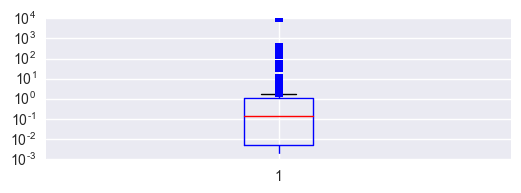

In [99]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
ax.boxplot(x, 0, 'rs', 'gD', 0.75)
ax.set_yscale('log')